In [1]:
%load_ext autoreload
%autoreload 2

import scripts.visualization as viz
viz.load_matplotlib()
plt = viz.plt

from scripts.experiments import perform_simulation, PhysicalLayerParameters, \
    SocialMediaParameters, QVoterParameters, VirtualLayerParameters

In [10]:
DEFAULT_L1_PARAMS = PhysicalLayerParameters(0.3, 0.2, 0.5)
DEFAULT_L2_PARAMS = VirtualLayerParameters(0.2, 0.3)
DEFAULT_L2_VOTER_PARAMS = QVoterParameters(4, 0.1, 0.3)
DEFAULT_L2_SOCIAL_MEDIA_PARAMS = SocialMediaParameters(0.4, 1e3)

output_metrics, l1, l2 = perform_simulation(l1_params=DEFAULT_L1_PARAMS,
                                            l2_params=DEFAULT_L2_PARAMS,
                                            l2_voter_params=DEFAULT_L2_VOTER_PARAMS,
                                            l2_social_media_params=DEFAULT_L2_SOCIAL_MEDIA_PARAMS)

Step: 0 / 20000
Step: 2000 / 20000
Step: 4000 / 20000
Step: 6000 / 20000
Step: 8000 / 20000
Step: 10000 / 20000
Step: 12000 / 20000
Step: 14000 / 20000
Step: 16000 / 20000
Step: 18000 / 20000


In [24]:
import numpy as np
from scripts.experiments import experiment1

qs = np.arange(0, 50)
ps = np.linspace(0, 1, 50)

experiment1(qs, ps, 'experiment1.csv', n_runs=100)

100%|██████████| 2/2 [00:20<00:00, 10.25s/it]


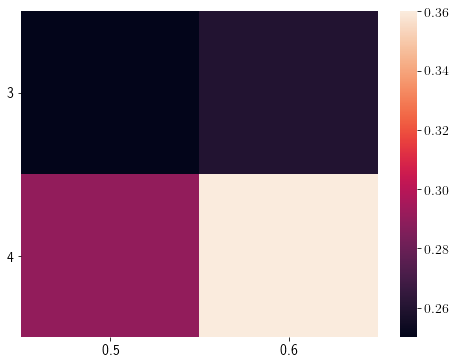

In [23]:
import seaborn as sns
import pandas as pd

dr = pd.read_csv('dead_ratio_test.csv', index_col=0)

ax = sns.heatmap(dr)
for item in ax.get_yticklabels():
    item.set_rotation(0)

In [13]:
from scripts.metrics import pearson_coefficient_between_layers

pearson_coefficient_between_layers(l1, l2)

0.9893408472685916

In [9]:
## Q experiments reusults

import pandas as pd

p_0 = pd.read_csv("../data/experiments/q_experiments/q_experiment_p=00_eta=03_nruns=100.csv", 
                 index_col=0)
p_05 = pd.read_csv("../data/experiments/q_experiments/q_experiment_p=05_eta=03_nruns=100.csv", 
                 index_col=0)
p_1 = pd.read_csv("../data/experiments/q_experiments/q_experiment_p=10_eta=03_nruns=100.csv", 
                 index_col=0)

[]

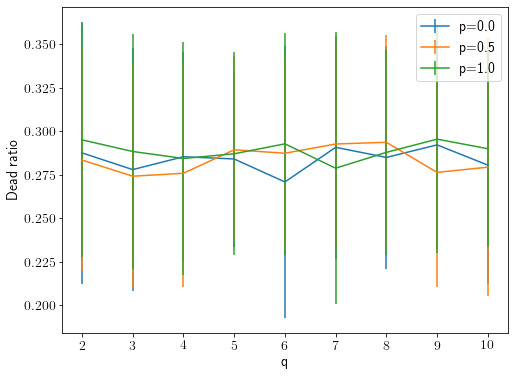

In [12]:
plt.errorbar(p_0['q'], p_0['mean_dead_ratio'], p_0['std_dead_ratio'], label='p=0.0')
plt.errorbar(p_05['q'], p_05['mean_dead_ratio'], p_05['std_dead_ratio'], label='p=0.5')
plt.errorbar(p_1['q'], p_1['mean_dead_ratio'], p_1['std_dead_ratio'], label='p=1.0')
plt.legend()
plt.xlabel('q')
plt.ylabel('Dead ratio')
plt.plot()

[]

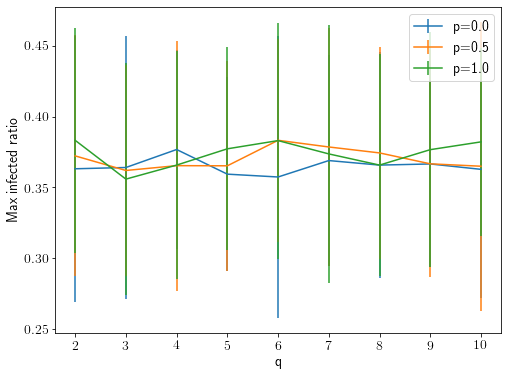

In [13]:
plt.errorbar(p_0['q'], p_0['mean_infected_ratio'], p_0['std_infected_ratio'], label='p=0.0')
plt.errorbar(p_05['q'], p_05['mean_infected_ratio'], p_05['std_infected_ratio'], label='p=0.5')
plt.errorbar(p_1['q'], p_1['mean_infected_ratio'], p_1['std_infected_ratio'], label='p=1.0')
plt.legend()
plt.xlabel('q')
plt.ylabel('Max infected ratio')
plt.plot()